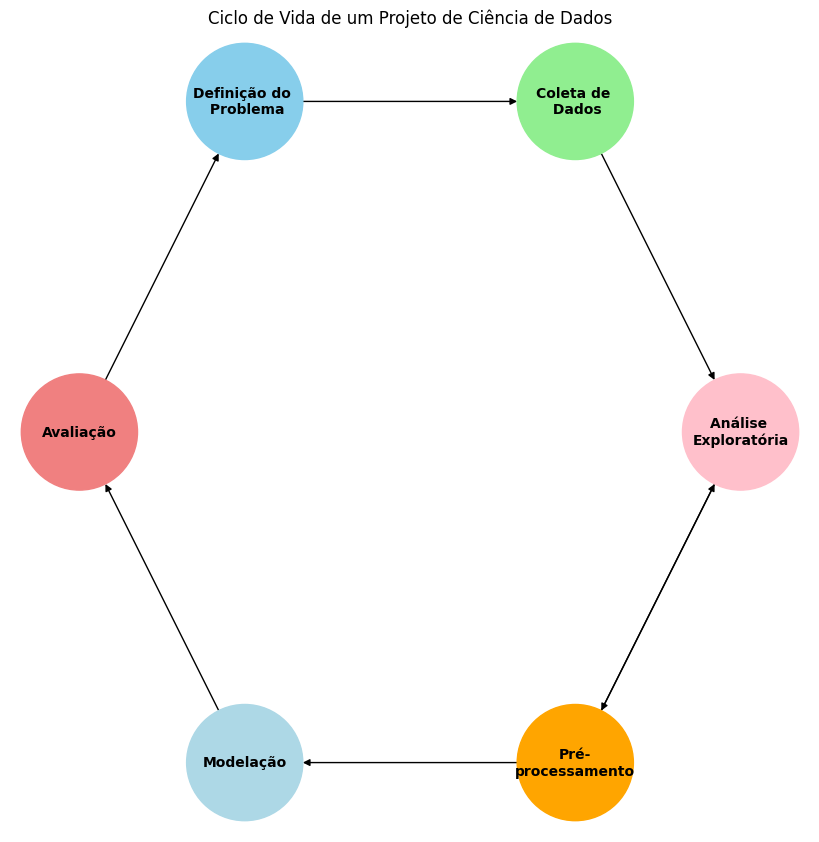

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Criação do grafo
G = nx.DiGraph()

# Adicionando nós ao grafo
G.add_nodes_from(['Definição do \n Problema', 'Coleta de \n Dados', 'Pré-\nprocessamento',
                  'Análise \nExploratória', 'Modelação', 'Avaliação'])

# Adicionando arestas ao grafo
G.add_edges_from([('Definição do \n Problema', 'Coleta de \n Dados'),
                  ('Coleta de \n Dados', 'Análise \nExploratória'),
                  ('Análise \nExploratória', 'Pré-\nprocessamento'),
                  ('Pré-\nprocessamento', 'Análise \nExploratória'),
                  ('Pré-\nprocessamento', 'Modelação'),
                  ('Modelação', 'Avaliação'),
                  ('Avaliação', 'Definição do \n Problema')])


# Definindo a posição dos nós para um layout circular personalizado
pos = {}
pos['Definição do \n Problema'] = np.array([-0.50000004,  0.8660254 ])
pos['Coleta de \n Dados'] =np.array([0.49999998, 0.86602546])
pos['Análise \nExploratória'] = np.array([1.00000000e+00, 2.45045699e-08])
pos['Pré-\nprocessamento'] = np.array([ 0.49999992, -0.86602541])
pos['Modelação'] = np.array([-0.49999989, -0.86602541])
pos['Avaliação'] = np.array([-9.99999970e-01, -6.29182054e-08])

# Definindo cores para cada nó
node_colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'lightblue', 'lightcoral']

# Criando uma nova figura com o tamanho adequado
plt.figure(figsize=(8, 8))

# Desenho do grafo com nós coloridos e rótulos ajustados
nx.draw(G, pos, with_labels=True, node_size=7000, node_color=node_colors, font_size=10, font_weight='bold')
plt.title('Ciclo de Vida de um Projeto de Ciência de Dados')

# Salvar a imagem como PNG
plt.savefig('../img/pipeline2.png', format='png', bbox_inches='tight')
plt.show()


In [44]:
def make_bracket(s, xy, textxy, width, ax):
    annotation = ax.annotate(
        s, xy, textxy, ha="center", va="center", size=20,
        arrowprops=dict(arrowstyle="-[", fc="w", ec="k",
                        lw=2,), bbox=dict(boxstyle="square", fc="w"))
    annotation.arrow_patch.get_arrowstyle().widthB = width

def plot_improper_processing(estimator_name):
    # Adapted from https://github.com/amueller/mglearn/blob/106cf48ef03710ef1402813997746741aa6467da/mglearn/plot_improper_preprocessing.py#L12
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))

    for axis in axes:
        bars = axis.barh([0, 0, 0], [11.9, 2.9, 4.9], left=[0, 12, 15],
                         color=['white', 'grey', 'grey'], hatch="//",
                         align='edge', edgecolor='k')
        bars[2].set_hatch(r"")
        axis.set_yticks(())
        axis.set_frame_on(False)
        axis.set_ylim(-.1, 6)
        axis.set_xlim(-0.1, 20.1)
        axis.set_xticks(())
        axis.tick_params(length=0, labeltop=True, labelbottom=False)
        axis.text(6, -.3, "training folds",
                  fontdict={'fontsize': 14}, horizontalalignment="center")
        axis.text(13.5, -.3, "validation fold",
                  fontdict={'fontsize': 14}, horizontalalignment="center")
        axis.text(17.5, -.3, "test set",
                  fontdict={'fontsize': 14}, horizontalalignment="center")

    make_bracket("scaler fit", (7.5, 1.3), (7.5, 2.), 15, axes[0])
    make_bracket(estimator_name + " fit", (6, 3), (6, 4), 12, axes[0])
    make_bracket(estimator_name + "predict", (13.4, 3), (13.4, 4), 2.5, axes[0])

    axes[0].set_title("Cross validation")
    axes[1].set_title("Test set prediction")

    make_bracket("scaler fit", (7.5, 1.3), (7.5, 2.), 15, axes[1])
    make_bracket(estimator_name + " fit", (7.5, 3), (7.5, 4), 15, axes[1])
    make_bracket(estimator_name + " predict", (17.5, 3), (17.5, 4), 4.8, axes[1])
    plt.savefig('../img/improper_cross.png', format='png', bbox_inches='tight')



def plot_proper_processing(estimator_name):
    # Adapted from https://github.com/amueller/mglearn/blob/106cf48ef03710ef1402813997746741aa6467da/mglearn/plot_improper_preprocessing.py#L12

    fig, axes = plt.subplots(2, 1, figsize=(15, 8))

    for axis in axes:
        bars = axis.barh([0, 0, 0], [11.9, 2.9, 4.9],
                         left=[0, 12, 15], color=['white', 'grey', 'grey'],
                         hatch="//", align='edge', edgecolor='k')
        bars[2].set_hatch(r"")
        axis.set_yticks(())
        axis.set_frame_on(False)
        axis.set_ylim(-.1, 4.5)
        axis.set_xlim(-0.1, 20.1)
        axis.set_xticks(())
        axis.tick_params(length=0, labeltop=True, labelbottom=False)
        axis.text(6, -.3, "training folds", fontdict={'fontsize': 14},
                  horizontalalignment="center")
        axis.text(13.5, -.3, "validation fold", fontdict={'fontsize': 14},
                  horizontalalignment="center")
        axis.text(17.5, -.3, "test set", fontdict={'fontsize': 14},
                  horizontalalignment="center")

    make_bracket("scaler fit", (6, 1.3), (6, 2.), 12, axes[0])
    make_bracket(estimator_name + " fit", (6, 3), (6, 4), 12, axes[0])
    make_bracket(estimator_name + " predict", (13.4, 3), (13.4, 4), 2.5, axes[0])

    axes[0].set_title("Cross validation")
    axes[1].set_title("Test set prediction")

    make_bracket("scaler fit", (7.5, 1.3), (7.5, 2.), 15, axes[1])
    make_bracket(estimator_name + " fit", (7.5, 3), (7.5, 4), 15, axes[1])
    make_bracket(estimator_name + " predict", (17.5, 3), (17.5, 4), 4.8, axes[1])
    fig.subplots_adjust(hspace=.3)
    plt.savefig('../img/proper_cross.png', format='png', bbox_inches='tight')

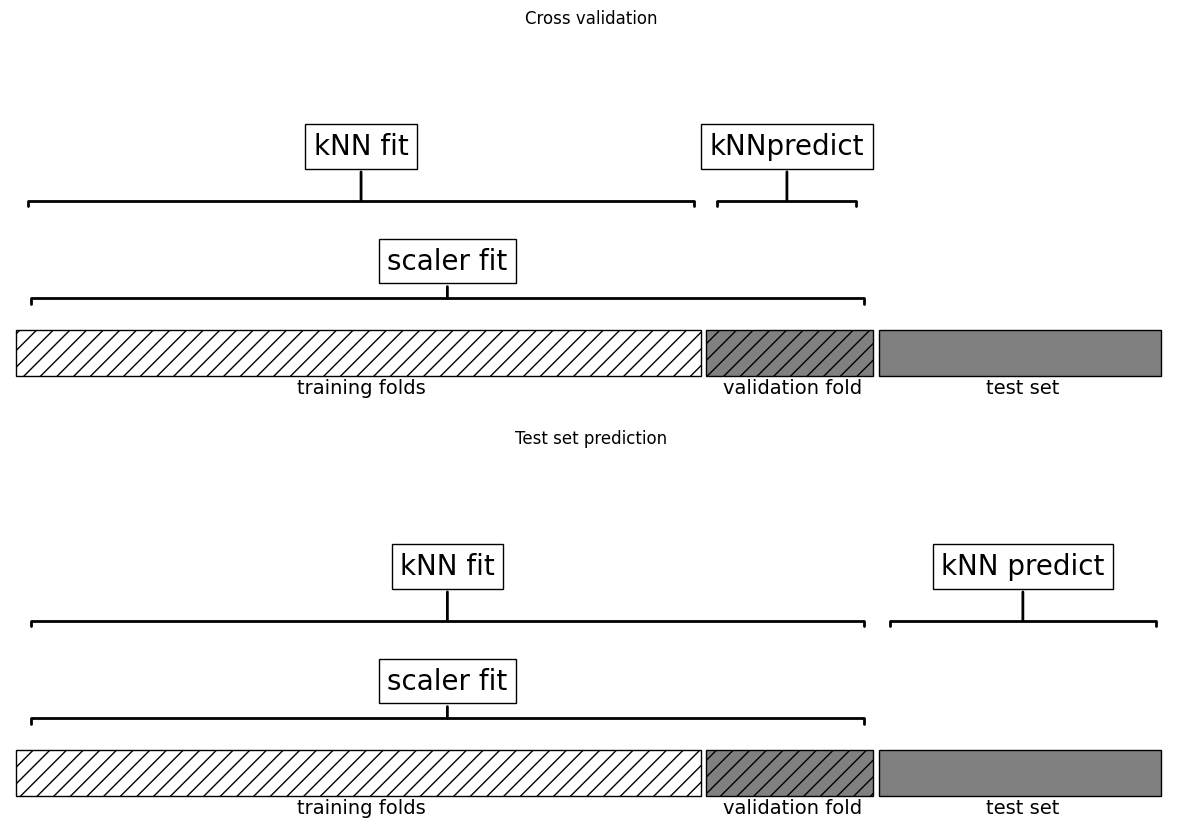

In [45]:
plot_improper_processing("kNN")

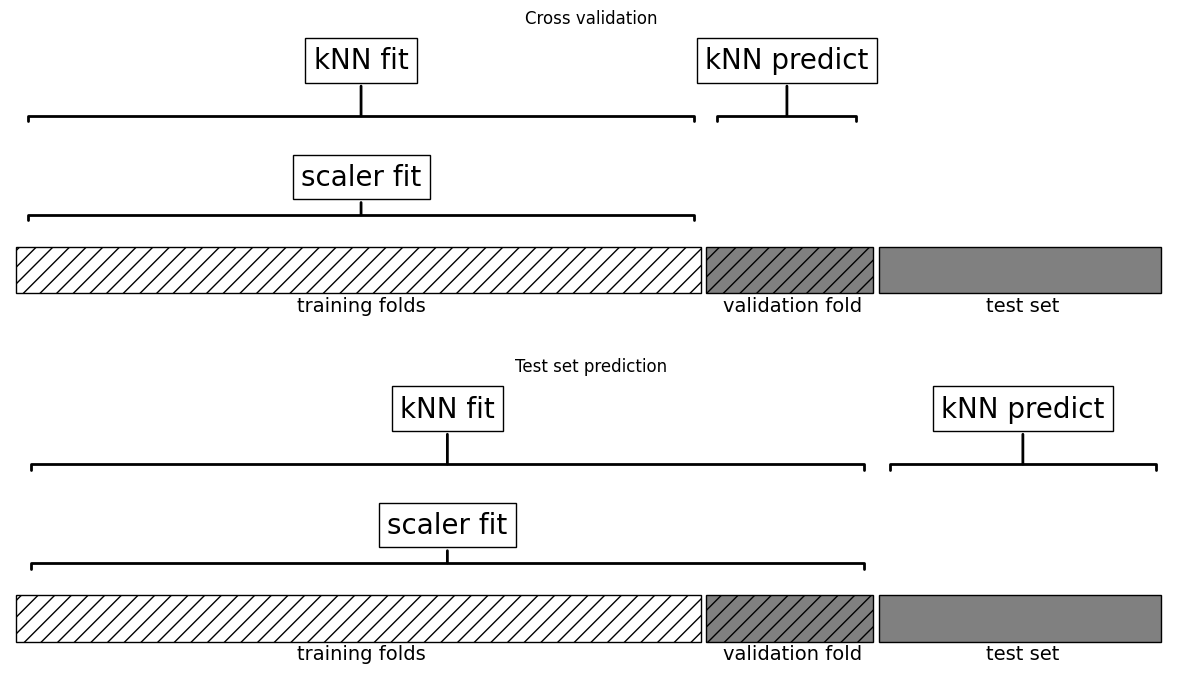

In [46]:
plot_proper_processing("kNN")